**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

# Data Preprocessing

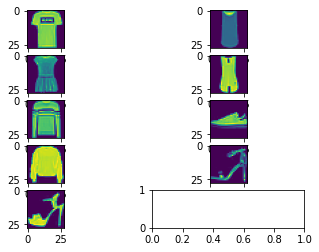

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [ ]:
x_train /= 255
x_test /=255
batch_size=64 

num_classes=10
epochs=1

def build_model(optimizer): 

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) 

  model.add(MaxPooling2D(pool_size=(2,2))) 

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu')) 

  model.add(MaxPooling2D(pool_size=(2,2))) 

  model.add(Dropout(0.25)) 

  model.add(Flatten()) 

  model.add(Dense(256, activation='relu')) 

  model.add(Dropout(0.5)) 

  model.add(Dense(num_classes, activation='softmax')) 

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy']) 
  model.summary()

  return model 

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'] 

for i in optimizers: 

  model = build_model(i)
  plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
  hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
  y1=hist.history['accuracy']
  y2=hist.history['val_accuracy']
  plt.plot(y1)
  plt.plot(y2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

# Predict Image

1/1 [==============================] - 0s 71ms/step
[[2.3701428e-03 6.1609288e-05 1.2226738e-02 7.2117883e-04 1.2293209e-01
  2.2050817e-05 8.5784298e-01 3.4762900e-07 3.8184042e-03 4.3993005e-06]]
Shirt


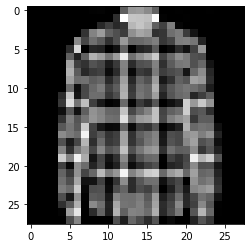

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
  img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(labels[answer])
  #label = '' if np.array(pred).size >= 0.5 else 'NORMAL'
  #print("prediction: ", label, "P(Pneumonia): ", pred[0][0])


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
